In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sn
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [2]:
X= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Indian_pines (1).mat')['indian_pines']
Y= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Indian_pines_gt (1).mat')['indian_pines_gt']

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

x_ = X.reshape((145*145, 220))
y_ = Y.reshape((145*145, 1))
print(x_.shape, y_.shape)

(21025, 220) (21025, 1)


In [3]:
names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']


x_.shape
y_.shape

print (x_.shape, y_.shape)

(21025, 220) (21025, 1)


In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x = sc_X.fit_transform(x_)
X_Train,  X_Test, Y_Train, Y_Test = train_test_split(x, y_, test_size = 0.25, random_state = 0)

In [5]:
#X_Train = sc_X.fit_transform(X_Train)
#X_Test = sc_X.transform(X_Test)

print(Y_Train.shape)

(15768, 1)


In [6]:
#classifier = SVC(kernel = 'linear', random_state = 0)

classifier =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_Train, Y_Train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=100, cache_size=10240)

In [7]:
Y_Pred = classifier.predict(X_Test)
print(Y_Pred)

[0 0 0 ... 0 0 8]


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

In [9]:
print(cm)
cm.shape

[[2338    2   37   20    9   18   20    1   13    1   36   54   16    3
   100   37    4]
 [   5    5    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  53    0  266    6    0    0    0    0    0    0    5   26    1    0
     0    0    0]
 [  17    0    7  165    4    0    0    0    0    0    0   15    3    0
     0    0    0]
 [  10    0    2    4   34    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  28    0    1    0    0   87    0    0    0    0    0    0    1    0
     0    0    0]
 [  35    0    0    0    0    0  155    0    0    0    0    0    0    0
     0    0    0]
 [   2    0    0    0    0    0    0    4    0    0    0    0    0    0
     0    0    0]
 [   7    1    0    0    0    0    0    0  110    0    0    0    0    0
     0    0    0]
 [   6    0    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0]
 [  34    0    6    1    0    0    0    0    0    0  169   18    0    0
     0    0    0]
 [  88    

(17, 17)

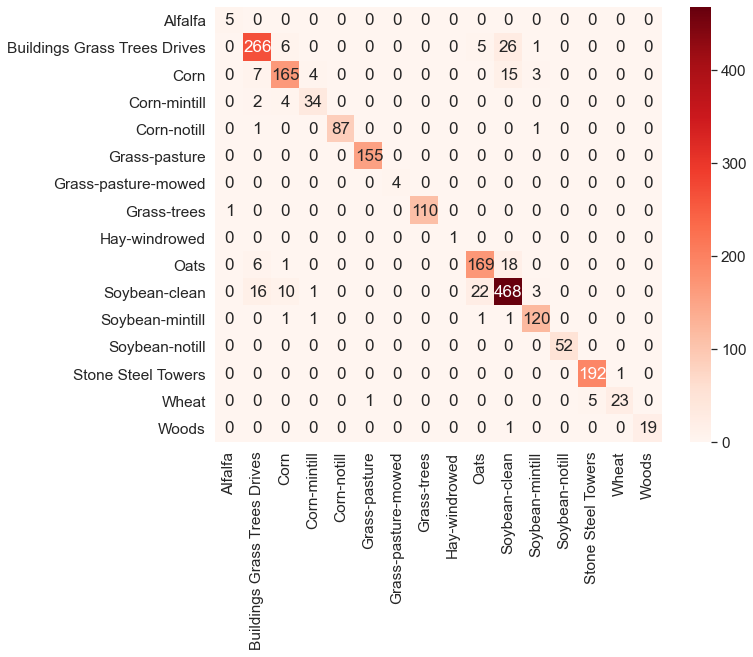

In [14]:

df_cm = pd.DataFrame(cm[1:17, 1:17] , columns=np.unique(names), index = np.unique(names))

#df_cm.index.name = 'Actual'

#df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,8))

sn.set(font_scale=1.4) #for label size

sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 17}, fmt='d')

plt.savefig('cmap.png', dpi=300)